In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/drive/MyDrive/brainwave/Reliance Trends Fashion.csv')

In [10]:
reliance = pd.DataFrame(df)
reliance.head(5)

,Brand,Description,Image_URL,Product_ID,Discount_Price (in Rs.),Original_Price (in Rs.),Product_URL,Category_by_gender,Category
0,performax,Typographic Print Track Pants with Insert Pockets,https://assets.ajio.com/medias/sys_master/root...,441136763008,974,"1,299",https://trends.ajio.com/performax-typographic-...,Men,Activewear
1,performax,Low-Top Lace-Up Sports Shoes,https://assets.ajio.com/medias/sys_master/root...,450137679013,"1,499","1,499",https://trends.ajio.com/performax-low-top-lace...,Men,Activewear
2,teamspirit,Colorblock Crew-Neck T-shirt,https://assets.ajio.com/medias/sys_master/root...,441133214008,461,549,https://trends.ajio.com/teamspirit-colorblock-...,Men,Activewear
3,performax,Camouflage Print Joggers with Insert Pockets,https://assets.ajio.com/medias/sys_master/root...,441134776020,"1,189","1,699",https://trends.ajio.com/performax-camouflage-p...,Men,Activewear
4,teamspirit,Reflective Colourblock Crew-Neck T-shirt,https://assets.ajio.com/medias/sys_master/root...,441136539020,425,599,https://trends.ajio.com/teamspirit-reflective-...,Men,Activewear


In [11]:
# 1. Data Cleaning and Preparation
# Convert price columns to numeric type
reliance['Discount_Price (in Rs.)'] = reliance['Discount_Price (in Rs.)'].str.replace(',', '').astype(float)
reliance['Original_Price (in Rs.)'] = reliance['Original_Price (in Rs.)'].str.replace(',', '').astype(float)

In [12]:

# 2. Total Sales Analysis
# Calculate total sales (considering discounted price)
reliance['Total_Sales'] = reliance['Discount_Price (in Rs.)']
total_sales = reliance['Total_Sales'].sum()
print(f"Total Sales: {total_sales}")


Total Sales: 29363675.0


In [13]:

# 3. Sales by Category
# Group by category and sum sales to analyze sales by category
sales_by_category = reliance.groupby('Category')['Total_Sales'].sum().sort_values(ascending=False)
print(sales_by_category)

Category
Footwear       7632776.0
Ethnicwear     5600847.0
Topwear        5257056.0
Westernwear    4624740.0
Bottomwear     2934537.0
Activewear     2009937.0
Fusionwear     1130849.0
Lingerie        139462.0
Innerwear        33471.0
Name: Total_Sales, dtype: float64


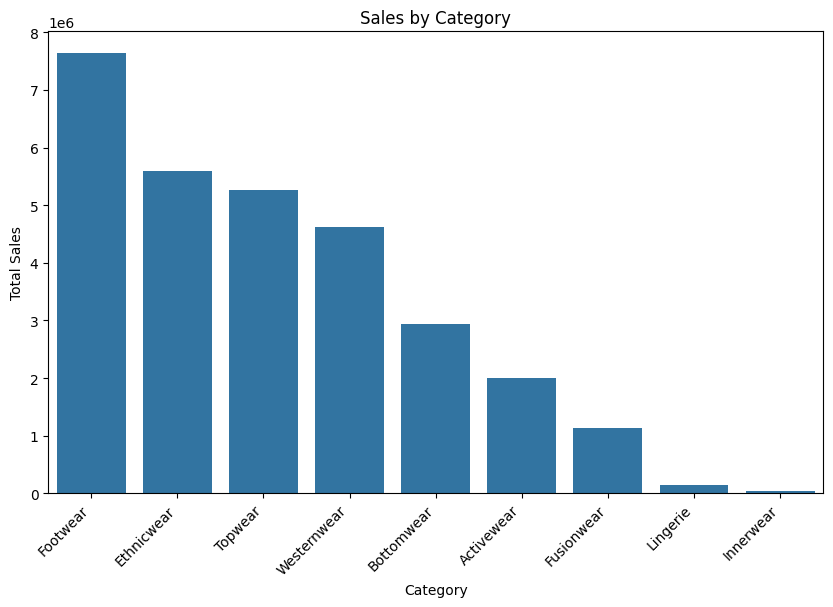

In [14]:
# Plot sales by category
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Sales by Category')
plt.xticks(rotation=45, ha='right')
plt.show()



In [15]:
# 4. Sales by Gender
# Group by gender and sum sales to analyze sales by gender
sales_by_gender = reliance.groupby('Category_by_gender')['Total_Sales'].sum()
print(sales_by_gender)

Category_by_gender
Men      13807331.0
Women    15556344.0
Name: Total_Sales, dtype: float64


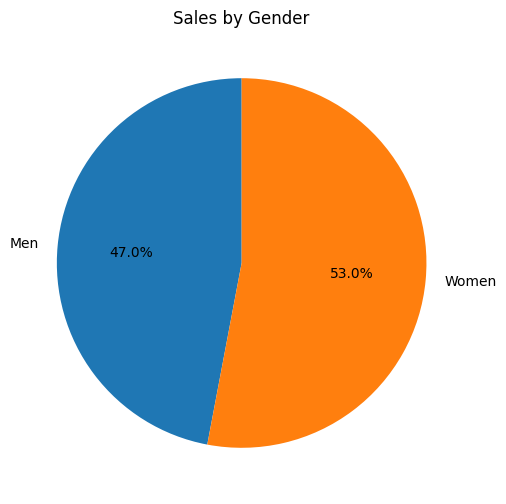

In [16]:
# Plot sales by gender
plt.figure(figsize=(6, 6))
plt.pie(sales_by_gender, labels=sales_by_gender.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales by Gender')
plt.show()

In [17]:

# 5. Top Selling Brands
# Group by brand and sum sales to identify top-selling brands
sales_by_brand = reliance.groupby('Brand')['Total_Sales'].sum().sort_values(ascending=False)
top_brands = sales_by_brand.head(10)  # Top 10 brands

print(top_brands)

Brand
performax       2702002.0
w               1811718.0
lee-cooper      1240901.0
netplay         1155519.0
john-players    1063903.0
teamspirit       979282.0
dnmx             946147.0
hi-attitude      817699.0
biba             813747.0
ajio             793756.0
Name: Total_Sales, dtype: float64


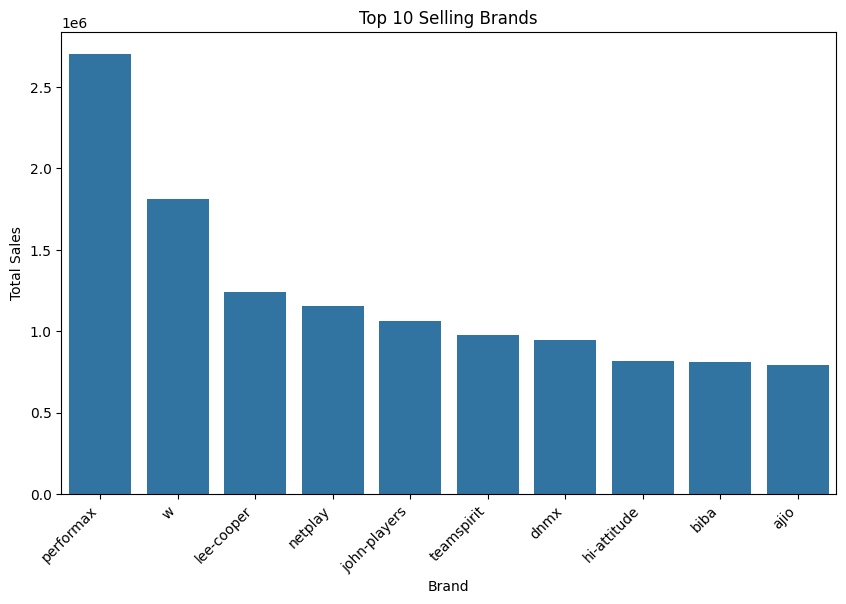

In [18]:
# Plot top-selling brands
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.title('Top 10 Selling Brands')
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
# 6. Discount Analysis
# Calculate the average discount percentage for all products
reliance['Discount_Percentage'] = ((reliance['Original_Price (in Rs.)'] - reliance['Discount_Price (in Rs.)']) / reliance['Original_Price (in Rs.)']) * 100
average_discount = reliance['Discount_Percentage'].mean()
print(f"Average Discount Percentage: {average_discount}")

Average Discount Percentage: 32.9789940007224


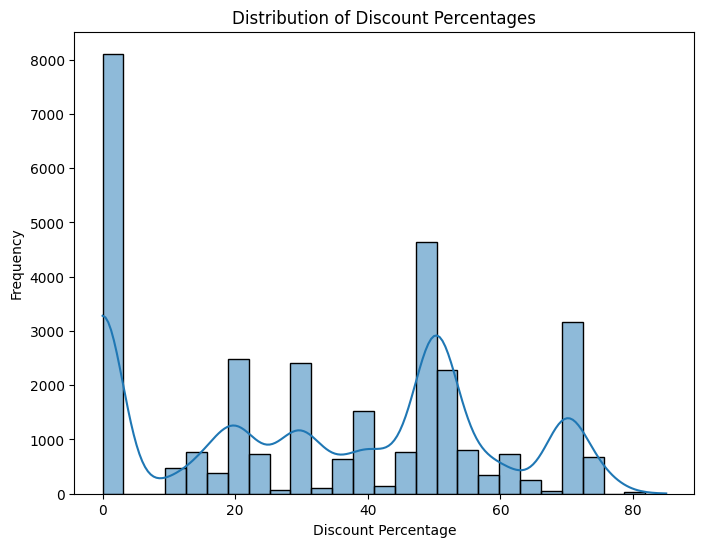

In [20]:

# Plot the distribution of discount percentages
plt.figure(figsize=(8, 6))
sns.histplot(reliance['Discount_Percentage'], kde=True)
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Discount Percentages')
plt.show()